In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import torch
import math
from torch.utils.data import DataLoader
from tqdm import tqdm
from crp.image import imgify, vis_opaque_img, plot_grid
from torch.optim import SGD, Adam
import copy

In [2]:
from expbasics.leemann import disjoint_orthogonality_loss, nearest_neighbors, vis_nearest_neighbors
from expbasics.helper import get_attribution_function, get_model_etc
from expbasics.network import train_network, accuracy_per_class
from expbasics.biased_noisy_dataset import BiasedNoisyDataset, get_biased_loader
from expbasics.ground_truth_measures import GroundTruthMeasures
from expbasics.crp_attribution import CRPAttribution
from torch.utils.data import Dataset, DataLoader, random_split

%reload_ext autoreload
%autoreload 2

In [26]:
BIAS = 0.96
NUM_IT = 2
BATCH_SIZE = 128
N_BASIS = 2
BATCH_STEP_SIZE = 256
NUM_NEIGHBORS = 36
SPATIAL_STEPSIZE = 1

MAX_INDEX = 491520
STRENGTH = 0.5
LR = 0.001

LAYER_NAME = "convolutional_layers.6" #"linear_layers.0" #
NUM_NEUR = 8#6

model, gm, crp_attribution, unbiased_ds, test_loader = get_model_etc(BIAS, num_it=NUM_IT)


In [27]:
from expbasics.causal_discovery import CausalDiscovery
from expbasics.plotting import plot_multipartite

caus_dis = CausalDiscovery(unbiased_ds, model, crp_attribution)

all variables: (20,),
 non-constant variables: (19,),                
 shape of dataset: (2000, 19) 
 new layers: 
[['factors', ['shape', 'scale', 'rot', 'posX', 'posY', 'watermark']], ['convolutional_layers.6', [0, 1, 2, 3, 4]], ['linear_layers.0', [0, 1, 2, 3, 4, 5]], ['linear_layers.2', [0, 1]]]
 var names = ['facts_shape' 'facts_scale' 'facts_rot' 'facts_posX' 'facts_posY'
 'facts_watermark' 'conv6_0' 'conv6_1' 'conv6_2' 'conv6_3' 'conv6_4'
 'line0_0' 'line0_1' 'line0_2' 'line0_3' 'line0_4' 'line0_5' 'line2_0'
 'line2_1']


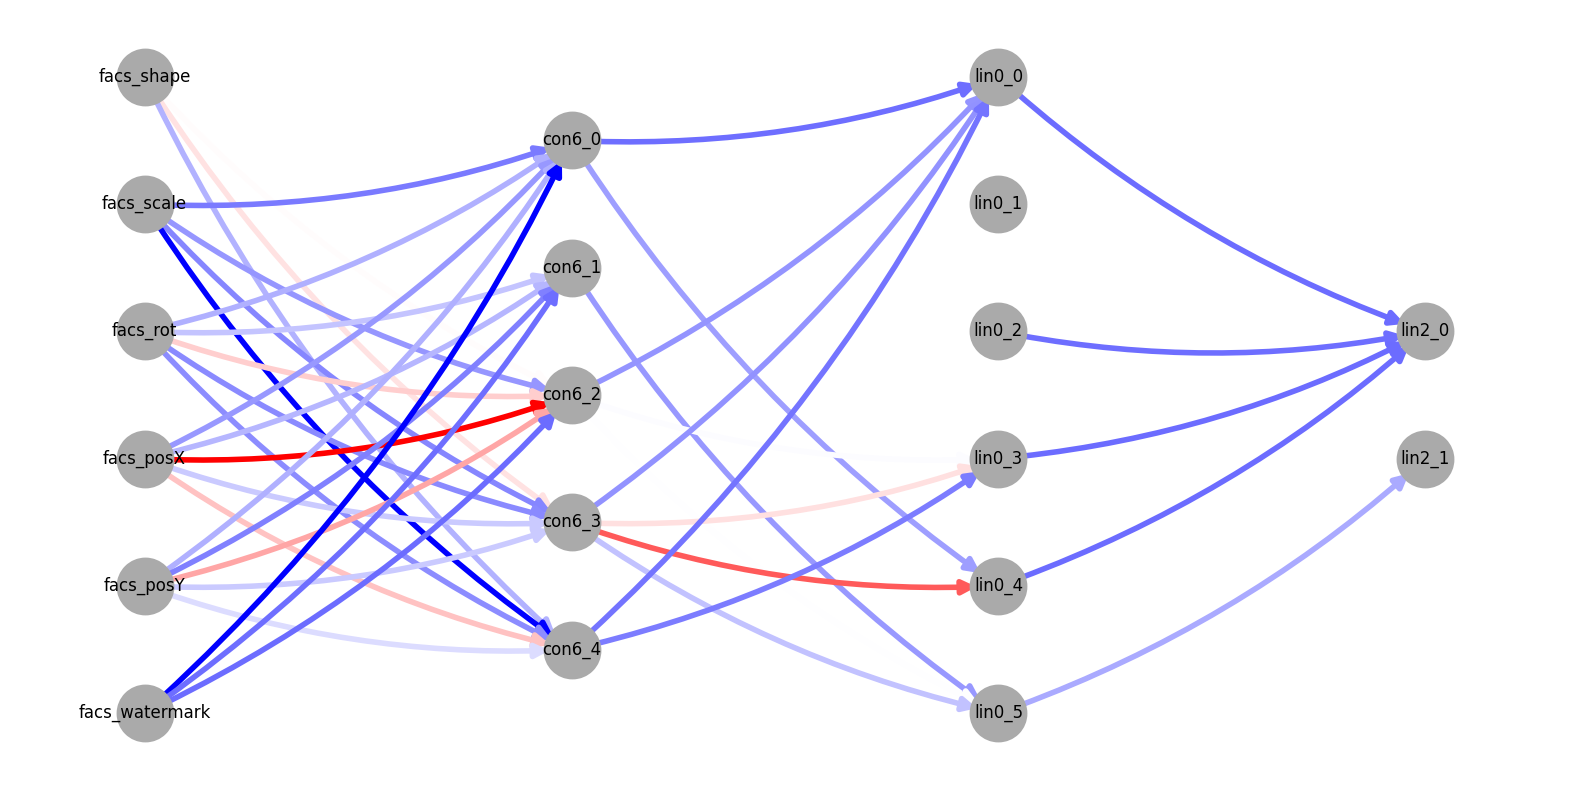

In [32]:
dataframe, var_names, layers, indices = caus_dis.no_constants_df(with_type=True)
results = caus_dis.causal_discovery(
    layers, dataframe, test="RegressionCI", link_assum=True
)

plot_multipartite(results, layers)